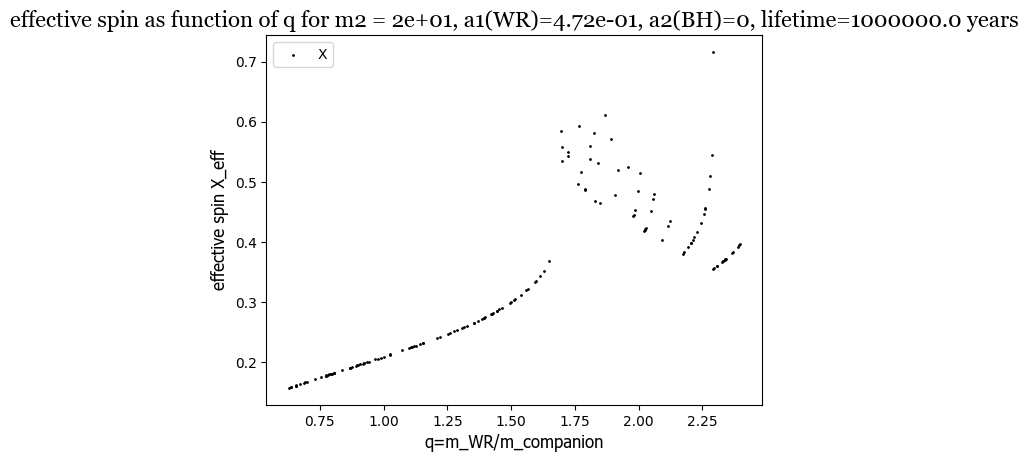

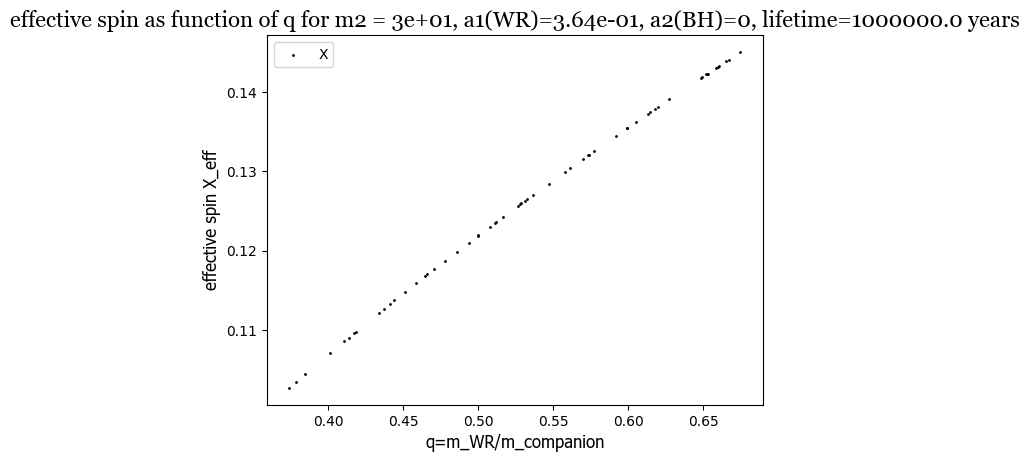

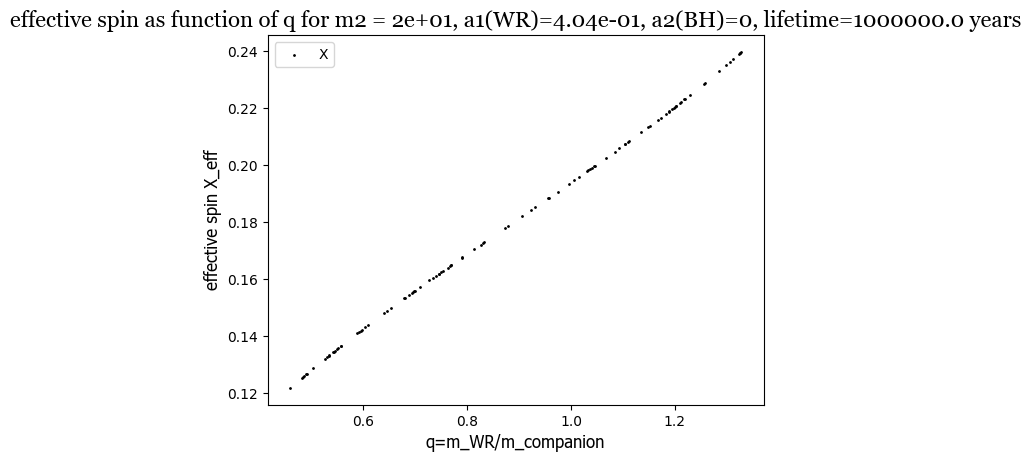

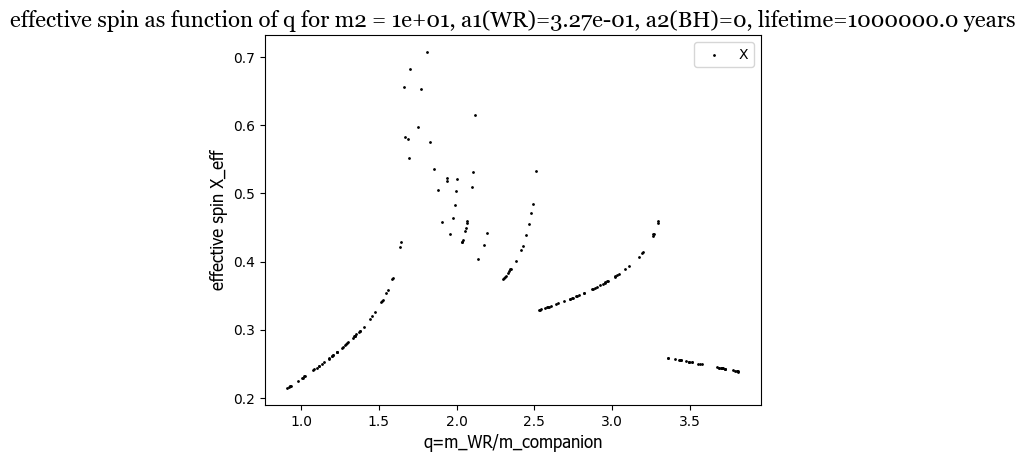

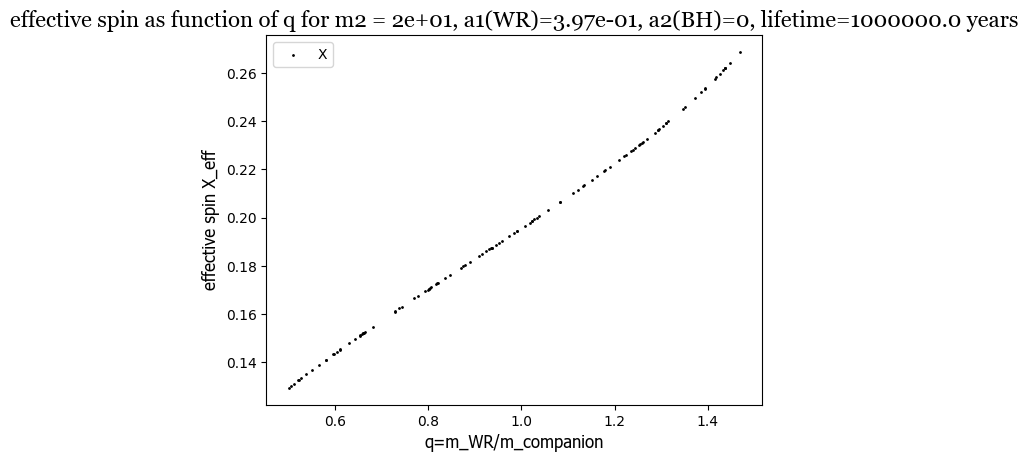

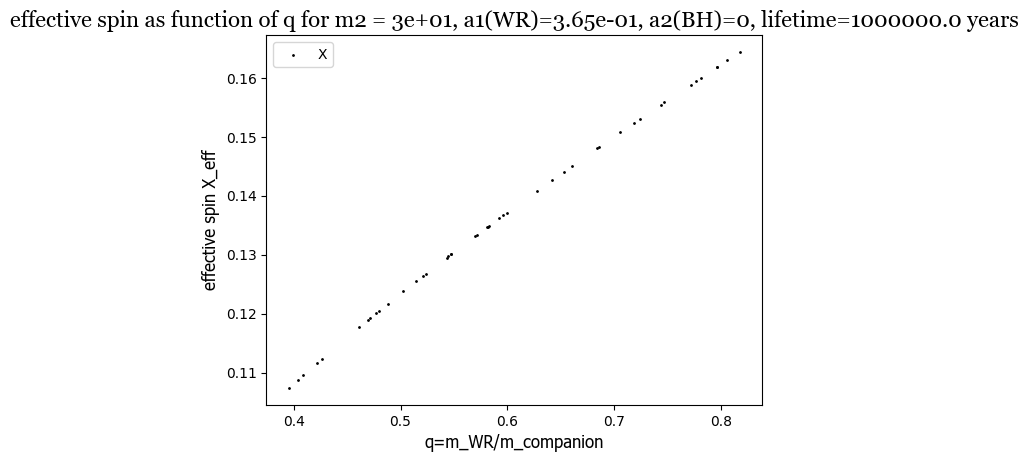

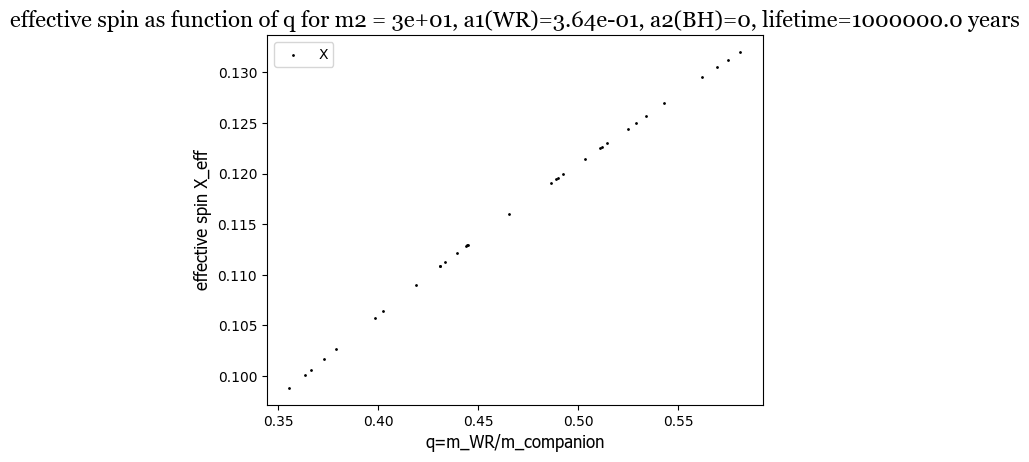

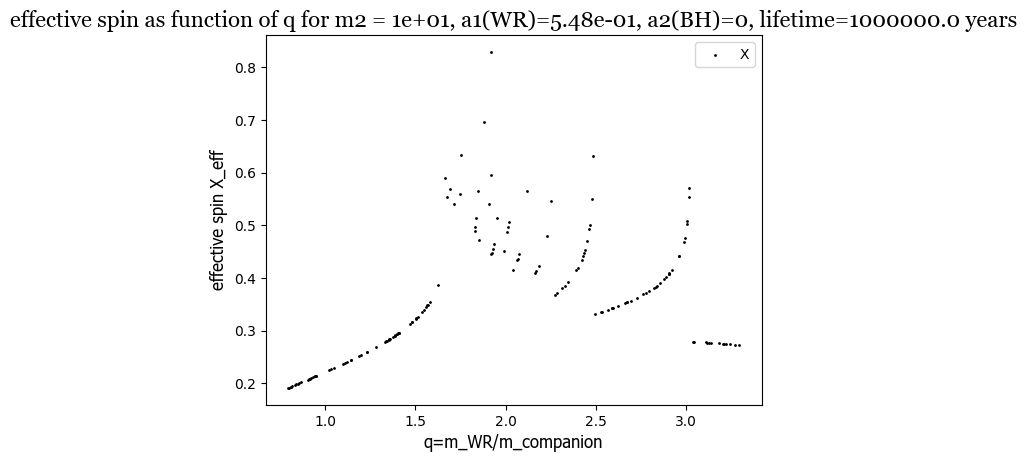

C:\Users\Hitomi\AppData\Local\Temp\ipykernel_44772\2167245540.py:60: RuntimeWarning: invalid value encountered in scalar power
  return K1*(f**(13/3))*(f/2-Omega)


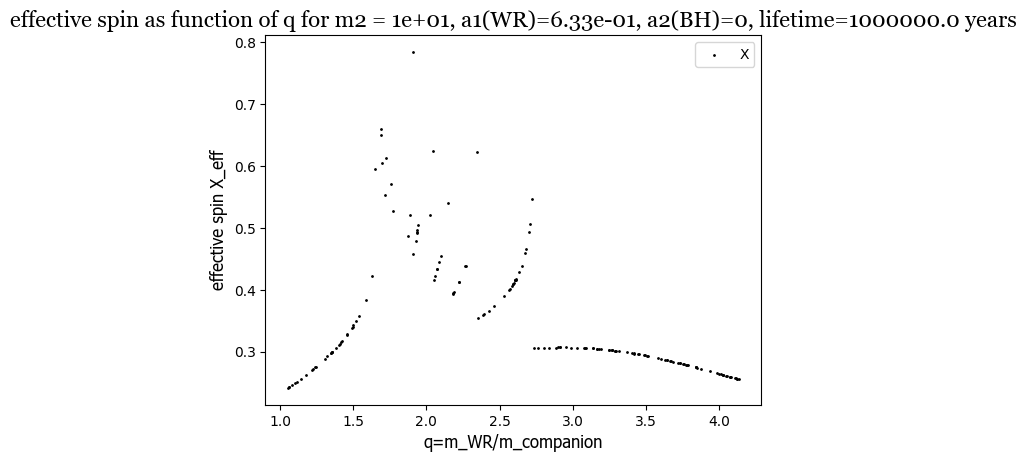

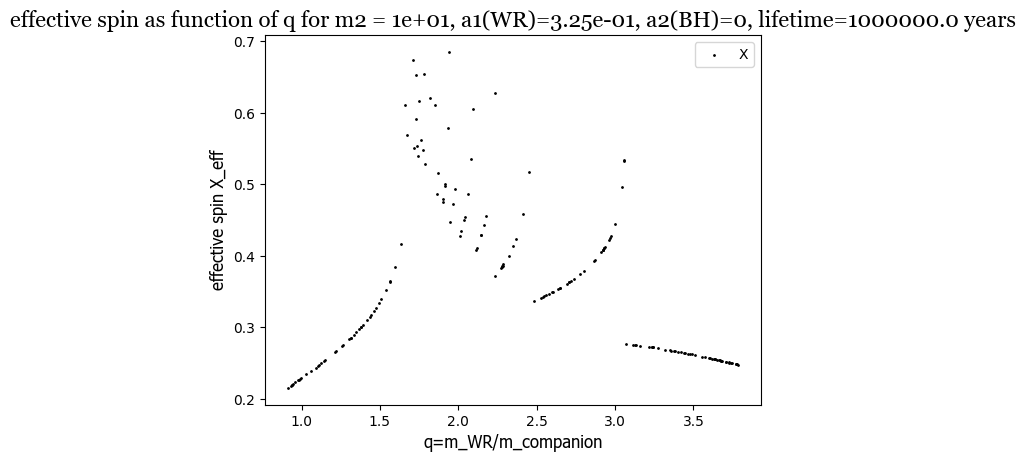

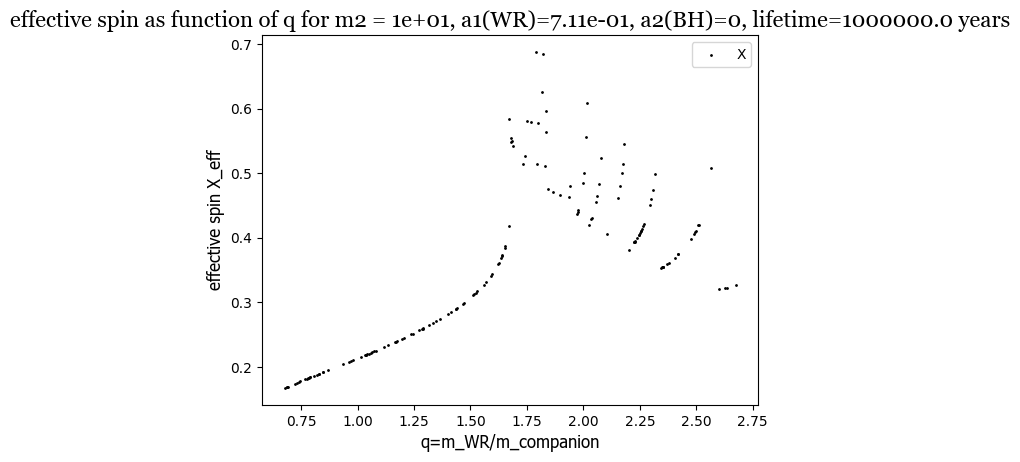

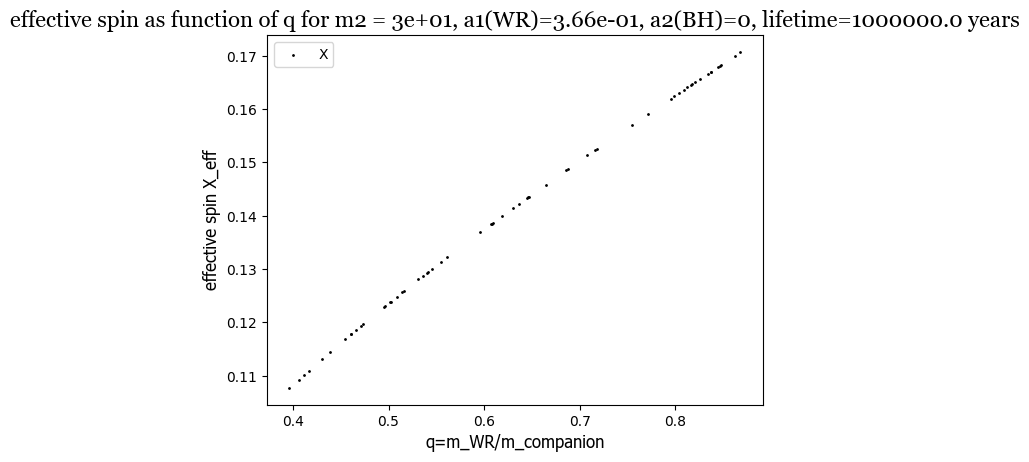

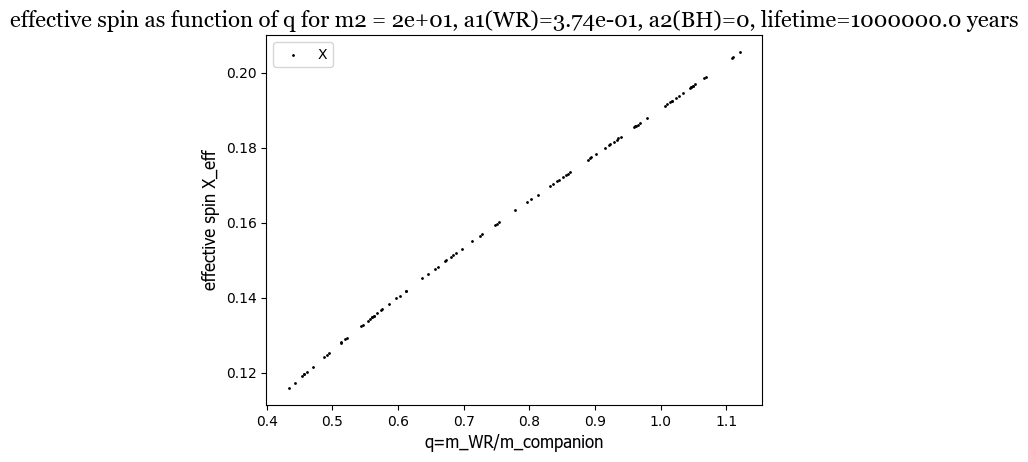

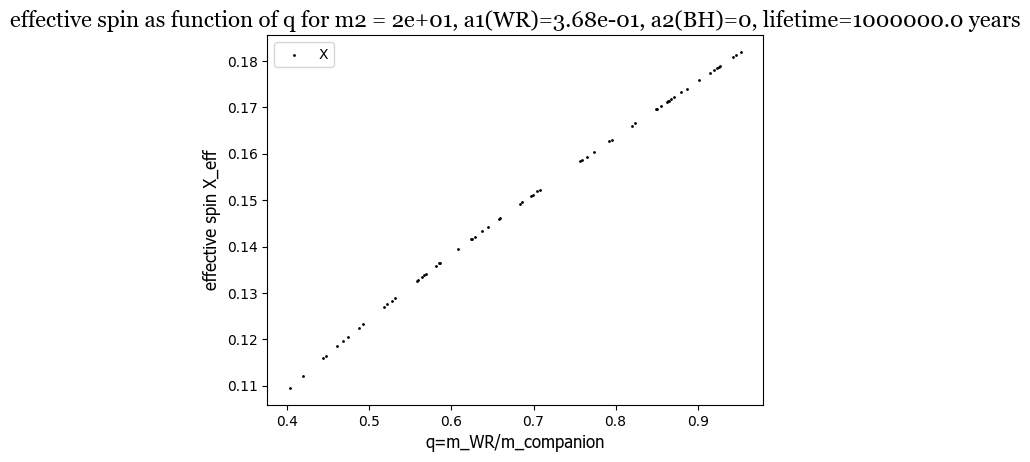

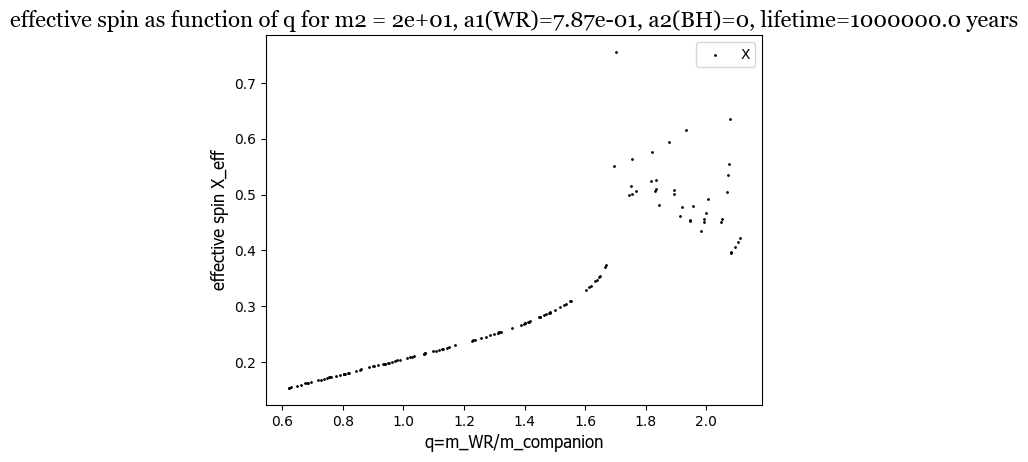

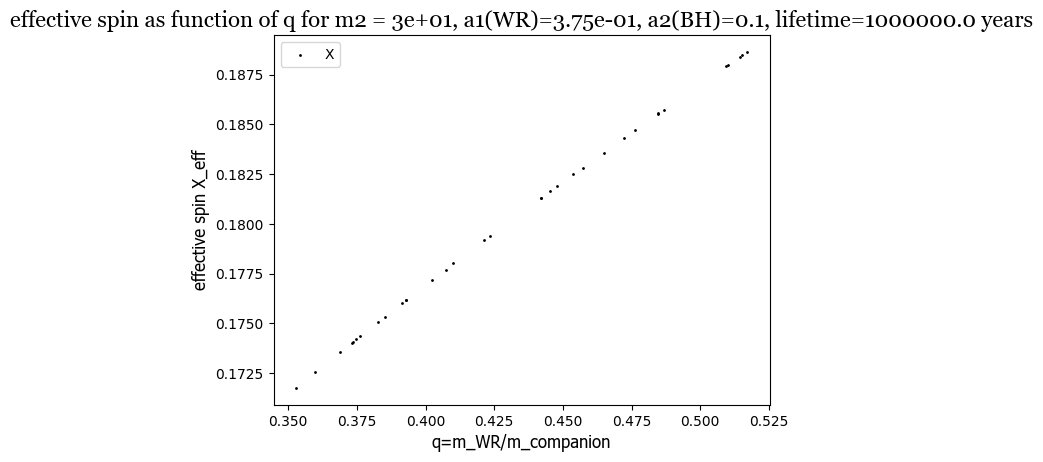

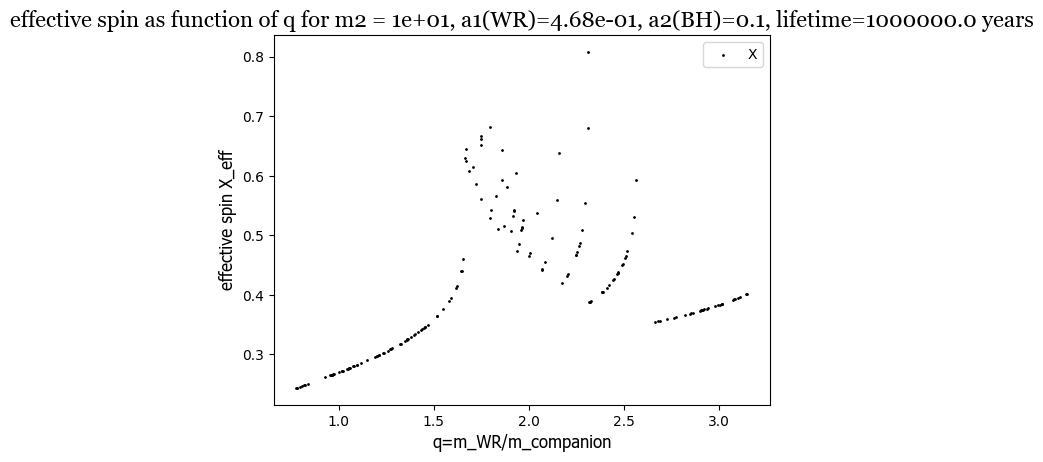

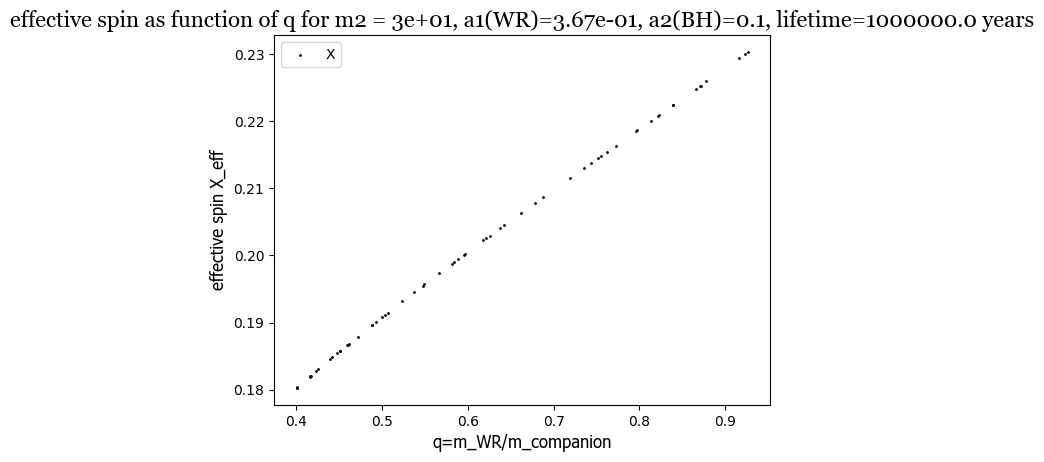

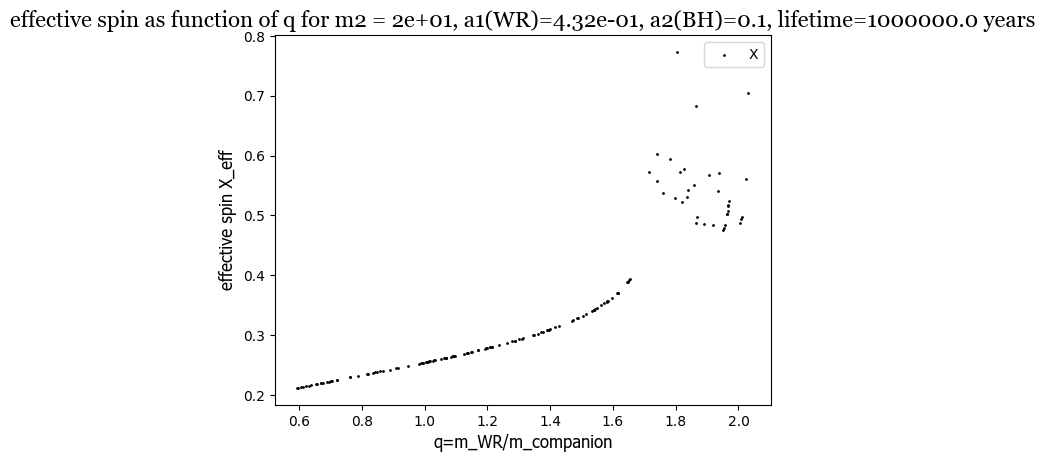

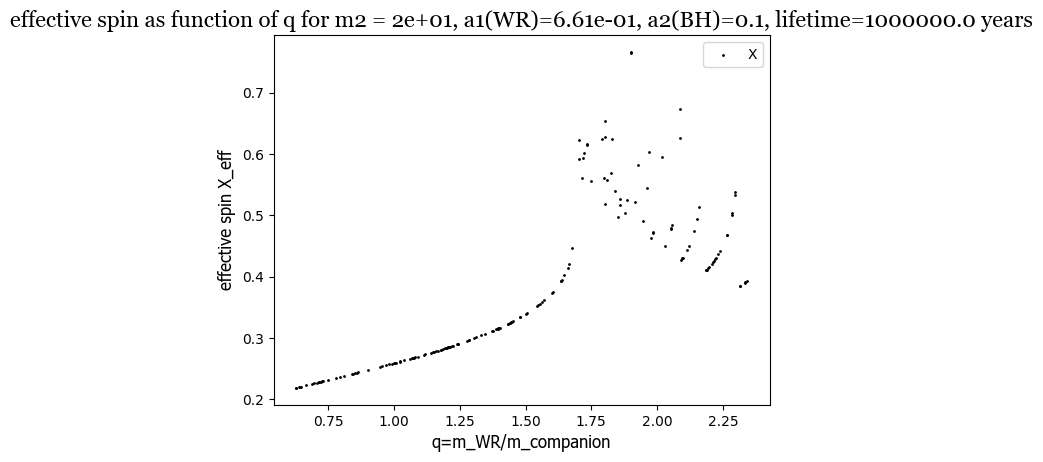

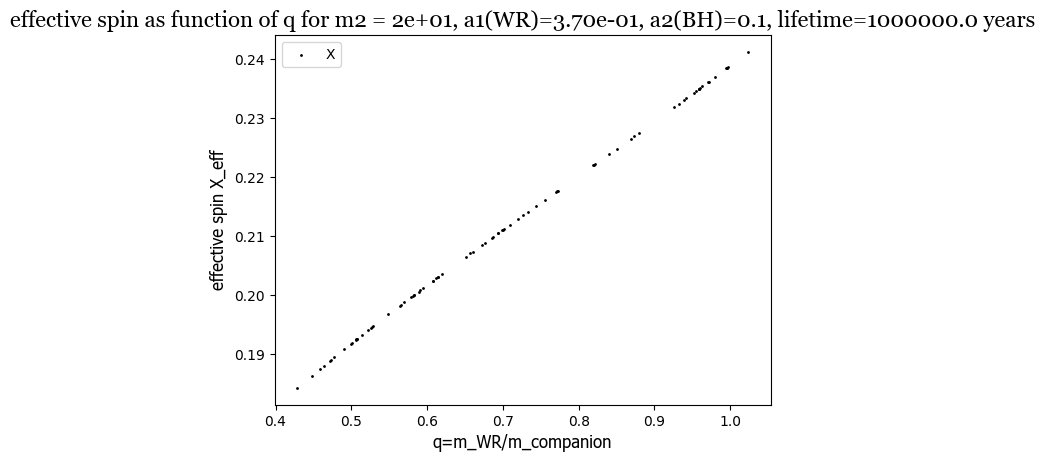

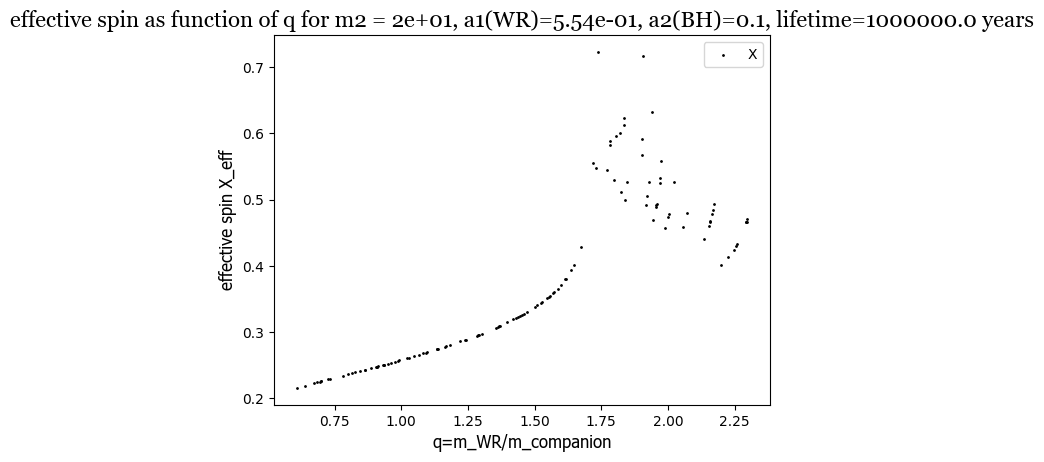

In [ ]:
# important libs and constants
import plot_utils as p
import functions as fct
import ODE_solver as odes
import numpy as np
import random
G = 6.674e-11  # N*m^2/Kg^2
Msolar = 1.989e30  # kg
Rsolar = 6.957e8  # in m
c = 299792458.0  # m/s

# shit just got real
# [random.uniform(10*Msolar, 100*Msolar) for _ in range(10)]


for lifetime in [1000, 10000, 1e5, 1e6]:
    for a2 in [0, 0.1]:  # random spin for BH

        for m2 in [random.uniform(10*Msolar, 200*Msolar) for _ in range(100)]:
            q_values = []
            X_eff_values = []
            for m1 in [random.uniform(10*Msolar, 200*Msolar) for _ in range(1000)]:
                for rg2 in [0.1]:
                    for k in [0.001]:
                        for Q in [1e4, 1e5, 1e6, 1e7]:
                            q = m1/m2

                            RWR1 = fct.radius_from_mass(
                                m1/Msolar)  # in solar radii
                            R1 = RWR1*Rsolar  # in m

                            a_max = fct.max_separation(1.36e10, m1, m2)  # in m
                            a_min = fct.min_separation(
                                q, RWR1)  # in solar radii
                            a_min_si = a_min*Rsolar  # in m

                            fmax = fct.gw_frequency(a_max, m1, m2)
                            fmin = fct.gw_frequency(a_min_si, m1, m2)

                            T_TF_max = fct.tidal_friction_timescale(
                                m1, m2, Q, k, a_max, RWR1, fmax)
                            T_TF_min = fct.tidal_friction_timescale(
                                m1, m2, Q, k, a_min_si, RWR1, fmin)

                            tfinal = lifetime*365.25*24*3600  # time in s

                            # checking timescales compared to lifetime, timescale has to be shorter for tides to have time to act
                            for a0 in [2*a_min_si, 3*a_min_si, 4*a_min_si, 5*a_min_si]:
                                f0 = fct.gw_frequency(a0, m1, m2)
                                T_TF = fct.tidal_friction_timescale(
                                    m1, m2, Q, k, a0, RWR1, f0)/(3600*24*365.25)
                                if T_TF <= lifetime:

                                    K1 = (18*k/Q)*(m2*(np.pi**(13/3))*(R1**5)) / \
                                        ((G**(5/3))*m1*(m1+m2)**(5/3))
                                    K2 = (3*k/Q)*((m2**2)*(np.pi**3)*(R1**3)) / \
                                        (G*m1*rg2*(m1+m2)**2)

                                    def dfdt(f, Omega):
                                        return K1*(f**(13/3))*(f/2-Omega)

                                    def dOmegadt(f, Omega):
                                        return K2*(f**3)*(f/2-Omega)

                                    # if i had a0 as a value and not in terms of a_min_si it would be better bc i could use plot2d instead of scatter2d

                                    for Omega0 in [1e-5]:
                                        sols = odes.solve_Radau(
                                            dxdt=dfdt, dydt=dOmegadt, x0=f0, y0=Omega0, t0=0, tfinal=tfinal, x_scale=1, y_scale=1, t_scale=1)

                                        # in years
                                        t = sols[0]/(3600*24*365.25)
                                        f = sols[1]  # in Hz
                                        Omega = sols[2]  # in Hz

                                        J = rg2*m1*(R1**2)*Omega[-1]
                                        a_spin = c*J/(G*m1*m1)
                                        a1 = a_spin

                                        X_eff = fct.effective_spin(q, a1, a2)

                                        X_eff_values.append(X_eff)
                                        q_values.append(q)

            if q_values != [] and X_eff_values != []:
                # plot X_eff vs q
                p.scatter2d(q_values, X_eff_values, xlabel='q=m_WR/m_companion', ylabel='effective spin X_eff',
                            title=f'effective spin as function of q for m2 = {format(m2/Msolar, '.0e')}, a1(WR)={format(a1, '.2e')}, a2(BH)={a2}, lifetime={lifetime} years', legend='X_eff(q)', colour='black', size=1, axis_font='Tahoma', axis_size=12, title_font='Georgia', title_size=16, legend_size=10)

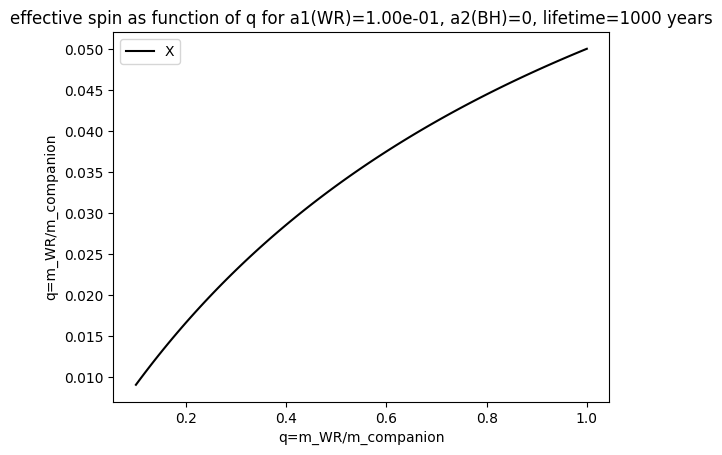

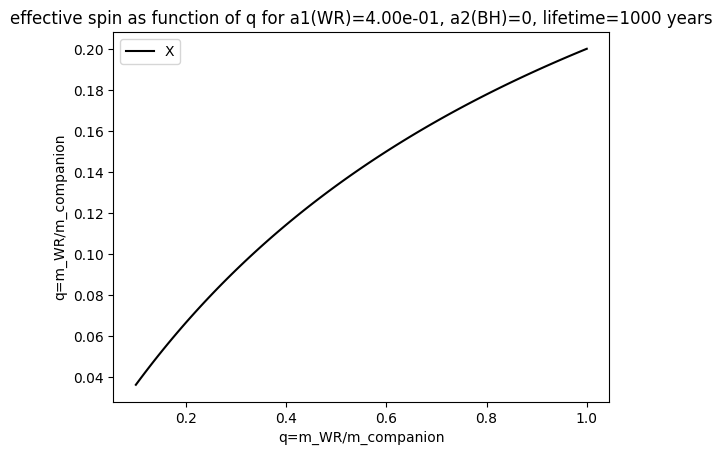

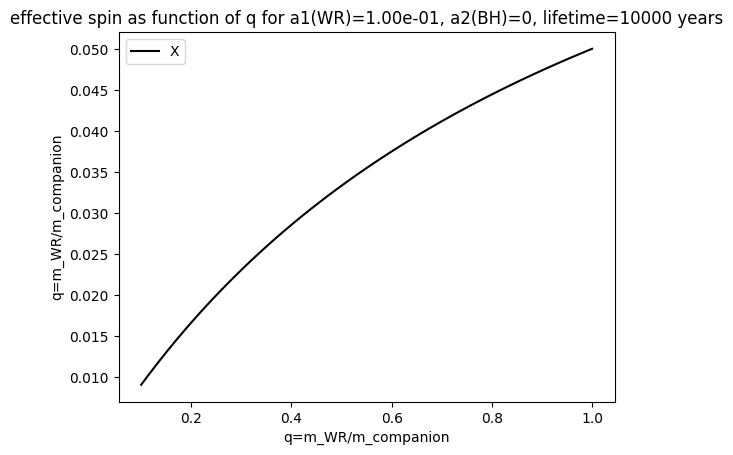

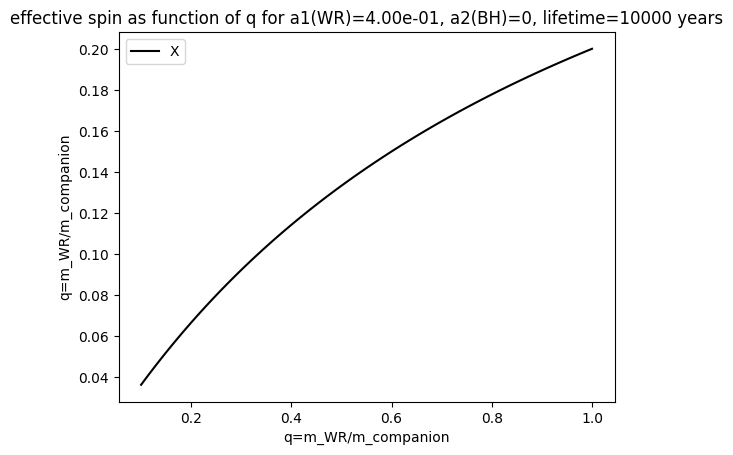

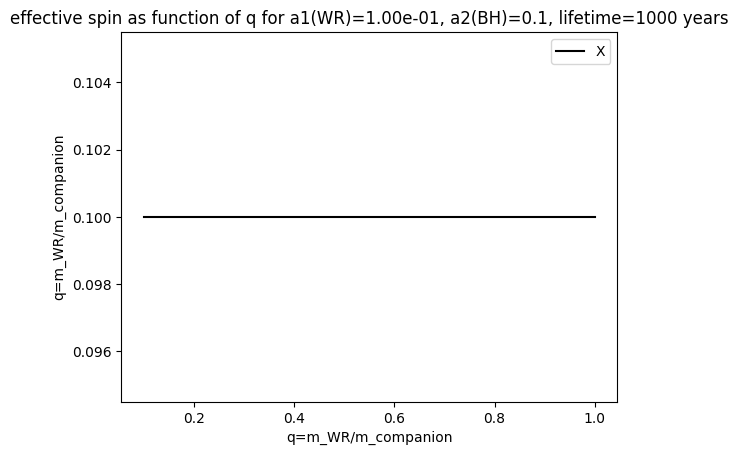

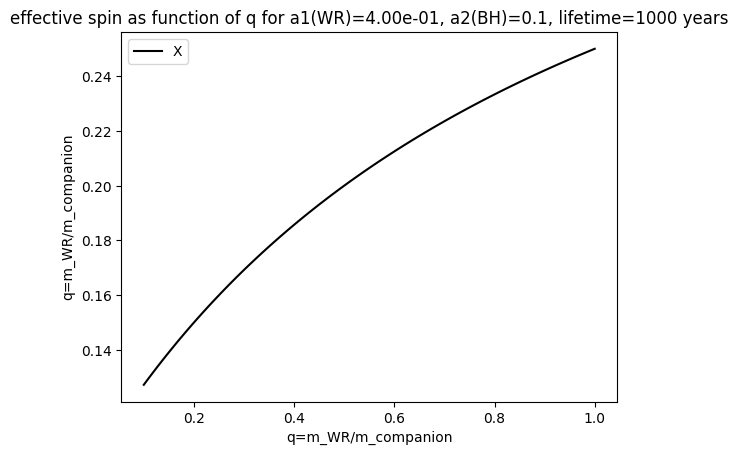

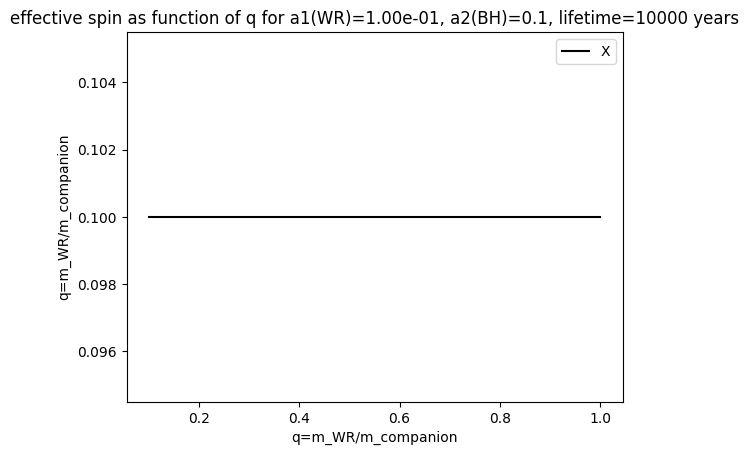

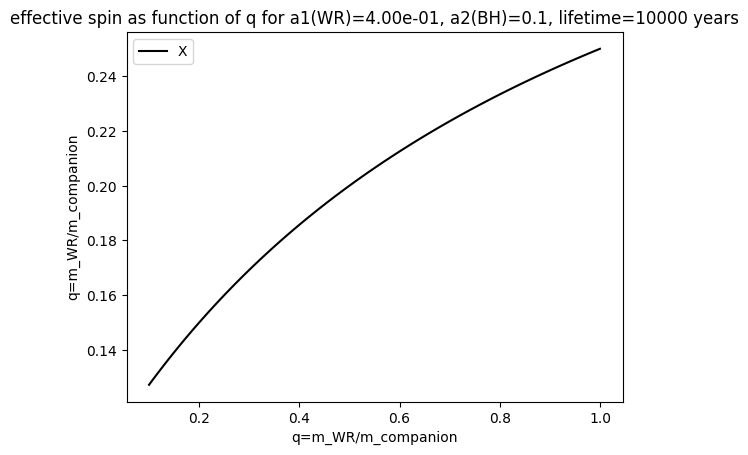

In [8]:
# oversimplified version
import plot_utils as p
import functions as fct
import ODE_solver as odes
import numpy as np
import random
G = 6.674e-11  # N*m^2/Kg^2
Msolar = 1.989e30  # kg
Rsolar = 6.957e8  # in m
c = 299792458.0  # m/s

q = np.linspace(0.1, 1, 100)

for a2 in [0, 0.1]:
    for lifetime in [1000, 10000]:
        for a1 in [0.1, 0.4]:
            X_eff = fct.effective_spin(q, a1, a2)
            p.plot2d(q, X_eff, xlabel='q=m_WR/m_companion', ylabel='effective spin X_eff',
                     title=f'effective spin as function of q for a1(WR)={format(a1, '.2e')}, a2(BH)={a2}, lifetime={lifetime} years', legend='X_eff(q)', colour='black')